In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("data/38_feature.csv",index_col=0)
data_norm = pd.read_csv("data/38_feature_norm.csv",index_col=0)
data_std_scale = pd.read_csv("data/38_feature_std_scale.csv",index_col=0)

X = data.iloc[:,2:]
y2 = data['class2']
y4 = data['class4']
X_norm = data_norm.iloc[:,2:]
X_std_scale = data_std_scale.iloc[:,2:]

In [12]:
# define dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y4, stratify=y4 ,test_size=0.20, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
LR_clf =LogisticRegression(C=20,penalty='l2',solver='liblinear',random_state=1,max_iter=1000).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('accuracy on train set',accuracy_score(LR_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(LR_clf.predict(X_test),y_test))

accuracy on train set 0.7131147540983607
accuracy on test set 0.6739130434782609


In [14]:
from sklearn.svm import SVC
SVC_clf =SVC(C=1.0,kernel='rbf',probability=True).fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('accuracy on train set',accuracy_score(SVC_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(SVC_clf.predict(X_test),y_test))

accuracy on train set 0.6885245901639344
accuracy on test set 0.6521739130434783


In [15]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_features = 'sqrt',n_estimators=1000)
RF_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('accuracy on train set',accuracy_score(RF_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(RF_clf.predict(X_test),y_test))

accuracy on train set 1.0
accuracy on test set 0.6956521739130435


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
GB_clf = GradientBoostingClassifier(n_estimators = 1000,learning_rate=0.01,subsample=0.7,max_depth=7)
GB_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
print('accuracy on train set',accuracy_score(GB_clf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(GB_clf.predict(X_test),y_test))

accuracy on train set 1.0
accuracy on test set 0.6521739130434783


In [28]:
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(
    estimators=[
        ('RF_clf', RF_clf),
        ('GB_clf', GB_clf),
        ('LR_clf', LR_clf)],
    voting='hard')

eclf.fit(X_train, y_train)

VotingClassifier(estimators=[('RF_clf',
                              RandomForestClassifier(max_features='sqrt',
                                                     n_estimators=1000)),
                             ('GB_clf',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         max_depth=7,
                                                         n_estimators=1000,
                                                         subsample=0.7)),
                             ('LR_clf',
                              LogisticRegression(C=20, max_iter=1000,
                                                 random_state=1,
                                                 solver='liblinear'))])

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(eclf,X_train,y_train,cv=10,scoring='accuracy')
scores.mean()

0.6445195195195196

In [30]:
print('accuracy on train set',accuracy_score(eclf.predict(X_train),y_train))
print('accuracy on test set',accuracy_score(eclf.predict(X_test),y_test))

accuracy on train set 1.0
accuracy on test set 0.6630434782608695


In [32]:
y_train.value_counts()

nonevent    183
II           94
Ib           66
Ia           23
Name: class4, dtype: int64

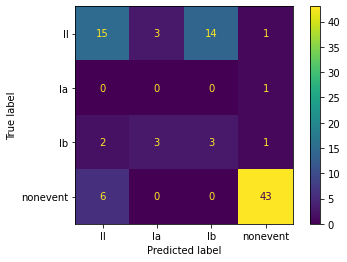

In [38]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(eclf.predict(X_test),y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=eclf.classes_)
disp.plot()
plt.show()